**Atividade 3.5 da disciplina RNA e Deep Learning**

**Aluna: Eveline Cavalcanti Feliciano Pontual**

# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil.
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from torch.autograd import Variable
import torch
import torchvision

## Carregamento dos dados do MNIST

In [2]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 8.98 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


<ipython-input-3-6143b94785d1>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [4]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(-0.5, 232.5, 87.5, -0.5)

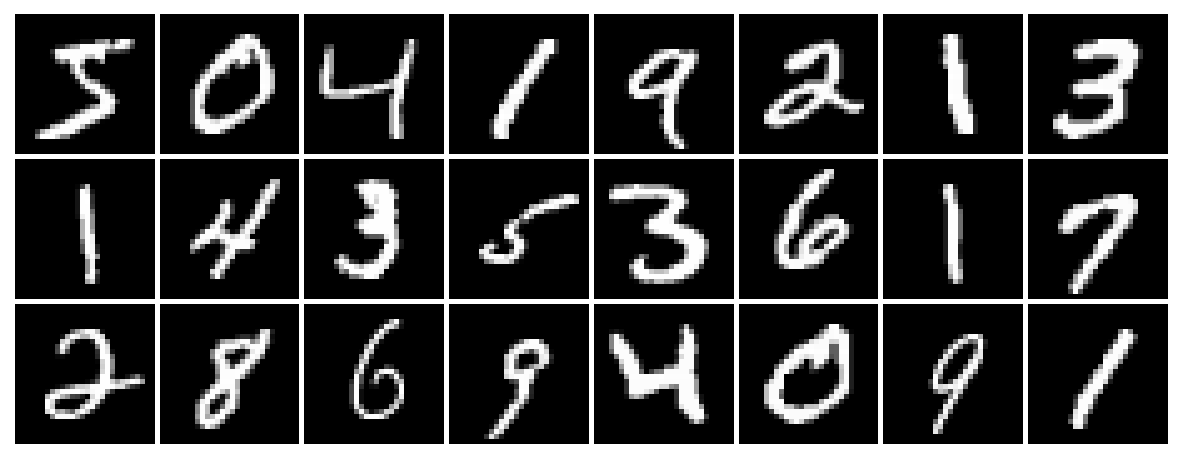

In [5]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


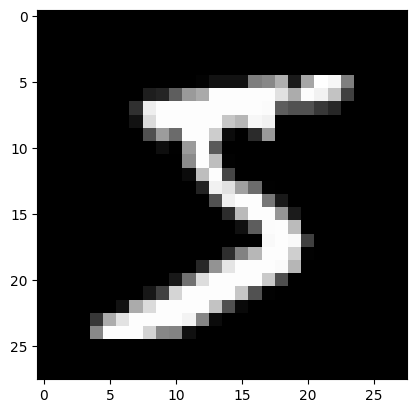

In [6]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy().reshape(28,28), cmap='gray')
print('class:', target)

## Modelo

In [7]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [8]:
## TODO

# Função de previsão
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)
    return predicts.data

# Definir o número de amostras para o teste (100 amostras)
n_samples_test = 1000

# Testando com as primeiras 'n_samples_test' amostras
y_pred = predict(model, x_train[:n_samples_test].view(-1, 28*28))

# Calcular a acurácia com as poucas amostras
accuracy = (y_pred.numpy() == y_train[:n_samples_test].numpy()).mean()

print('Accuracy (com poucas amostras):', accuracy)

Accuracy (com poucas amostras): 0.123


## Treinamento

### Inicialização dos parâmetros

In [9]:
epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [10]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-6q2370ac
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-6q2370ac
  Resolved https://github.com/szagoruyko/pytorchviz to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4972 sha256=d45aabf39e66918d19d903e3a1841dae13a3e70b4b08ba00d1a1be509c33eef3
  Stored in directory: /tmp/pip-ephem-wheel-cache-hucorsz2/wheels/44/5a/39/48c1209682afcfc7ad8ae7b3cf7aa0ff08a72e3ac4e5931f1d
Successfully built torchviz


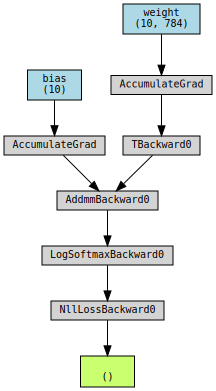

In [11]:
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
from torchviz import make_dot, make_dot_from_trace
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [12]:
from IPython import display
import numpy
a = 5
losses = []
zs = []
fig = plt.figure(figsize=(18, 6))

try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)
        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()

except KeyboardInterrupt:
    pass

<Figure size 1800x600 with 0 Axes>

In [13]:
model.weight.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [14]:
print('Final loss:', loss.data)

Final loss: tensor(1.0904)


### Visualizando gráfico de perda durante o treinamento

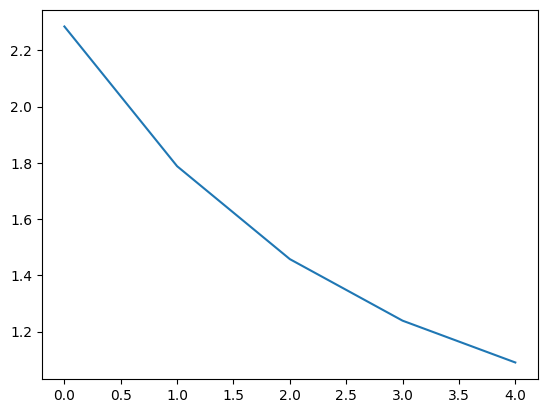

In [15]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [16]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.808


### Matriz de confusão com dados de treinamento e teste

In [17]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,94,0,4,1,0,6,2,2,0,3
1,0,109,11,1,2,4,3,6,8,1
2,1,0,73,2,1,2,2,1,3,1
3,0,0,0,78,1,19,0,0,9,3
4,0,0,2,0,92,8,3,4,0,8
5,0,2,0,4,0,45,1,0,1,0
6,2,1,1,1,2,3,83,0,2,1
7,0,1,5,4,0,1,0,101,0,11
8,0,3,3,0,0,2,0,0,63,2


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


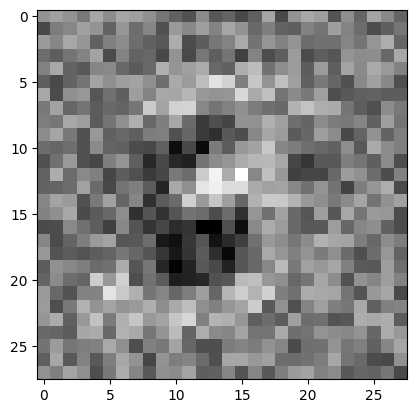

In [18]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

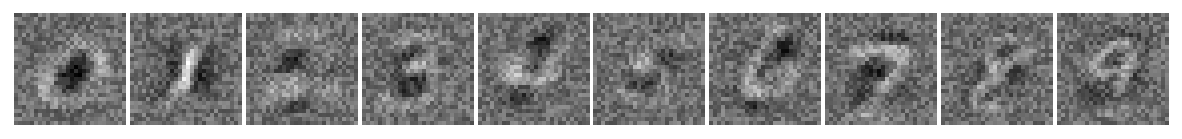

In [19]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

Época 1/5 - Perda: 0.9828 - Acurácia: 0.8080
Época 2/5 - Perda: 0.9035 - Acurácia: 0.8320
Época 3/5 - Perda: 0.8420 - Acurácia: 0.8340
Época 4/5 - Perda: 0.7928 - Acurácia: 0.8440
Época 5/5 - Perda: 0.7521 - Acurácia: 0.8480


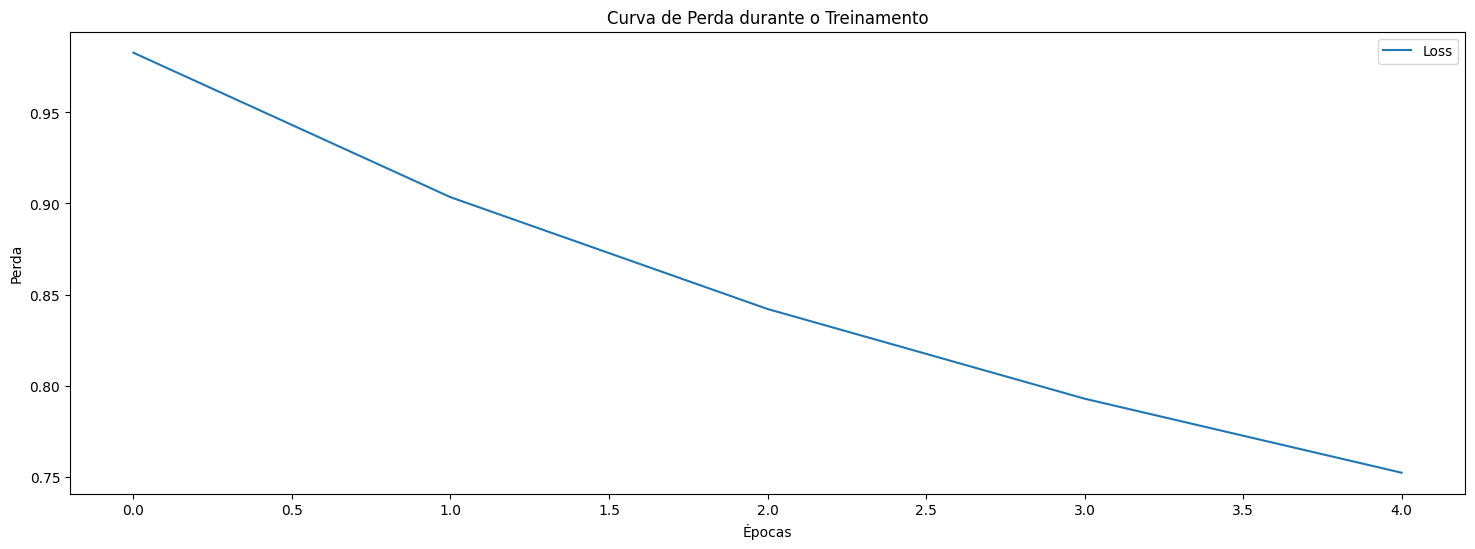

Acurácia final: 0.8540


In [20]:
#Primeira Questão

# Inicializar a figura para plotagem
fig = plt.figure(figsize=(18, 6))

losses = []
zs = []

# Número de épocas
epochs = 5

try:
    for epoch in range(epochs):
        # Transformar a entrada para uma dimensão (flatten)
        inputs = Variable(x_train.view(-1, 28 * 28))

        # Passar os dados pela rede (forward pass)
        outputs = model(inputs)

        # Armazenar a saída de uma amostra
        zs.append(outputs[1].detach().numpy())

        # Calcular a perda (cross-entropy loss)
        loss = criterion(outputs, Variable(y_train))

        # Zero do gradiente, backpropagation e ajuste dos parâmetros
        optimizer.zero_grad()
        loss.backward()  # Cálculo do gradiente
        optimizer.step()  # Atualiza os pesos com o gradiente descendente

        losses.append(loss.data)

        # Realizar a previsão (cálculo de classe predita)
        _, predicts = torch.max(outputs, 1)
        y_pred = predicts.data

        # Calcular a acurácia da época
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()

        # Exibir informações da época
        print(f"Época {epoch+1}/{epochs} - Perda: {loss.item():.4f} - Acurácia: {accuracy:.4f}")

except KeyboardInterrupt:
    pass

# Plotar a curva da perda ao longo das épocas
plt.plot(losses, label="Loss")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.title("Curva de Perda durante o Treinamento")
plt.legend()
plt.show()

# Se quiser ver a acurácia final em todas as amostras
y_pred = predict(model, x_train.view(-1, 28 * 28))
accuracy_final = (y_pred.numpy() == y_train.numpy()).mean()
print(f"Acurácia final: {accuracy_final:.4f}")

In [21]:
# Segunda Questão
# Inicializar a figura para plotagem
fig = plt.figure(figsize=(18, 6))

losses = []
zs = []

# Número de épocas
epochs = 5

try:
    for epoch in range(epochs):
        # Transformar a entrada para uma dimensão (flatten)
        inputs = Variable(x_train.view(-1, 28 * 28))

        # Passar os dados pela rede (forward pass)
        outputs = model(inputs)

        # Armazenar a saída de uma amostra (como exemplo)
        zs.append(outputs[1].detach().numpy())

        # Calcular a perda (cross-entropy loss)
        loss = criterion(outputs, Variable(y_train))

        # Zero do gradiente, backpropagation e ajuste dos parâmetros
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)

        # Realizar a previsão (cálculo de classe predita)
        _, predicts = torch.max(outputs, 1)
        y_pred = predicts.data

        # Visualizar os gradientes para a classe 4
        class_4_gradients = model.weight.grad[4].detach().numpy()  # Gradientes para a classe 4
        print(f"Gradientes da classe 4 na época {epoch+1}: {class_4_gradients[10:]}...")

except KeyboardInterrupt:
    pass


Gradientes da classe 4 na época 1: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.92840507e-05  1.19561111e-04  0.00000000e+00  5.62108798e-05
  2.26384931e-04  2.98546162e-04  2.19744237e-04  2.79195083e-04
  1.35978858e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.28664940e-04  6.45836408e-04  4.55194502e-04  4.086

<Figure size 1800x600 with 0 Axes>

<details>
<summary>Mostrar Resultado</summary>

```python
from IPython import display
import numpy
a = 5
losses = []
zs = []
fig = plt.figure(figsize=(18, 6))

try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)
        weights_d = model.weight.data[4].numpy().reshape(28,28)
        weights_g = model.weight.grad.data[4].numpy().reshape(28,28)
        ww = np.concatenate((weights_d,weights_g),1)
        plt.imshow(ww.reshape((28,28*2)),cmap = 'gray')
        display.display(fig)
        display.clear_output(wait=True)
        input(i)
        
        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()
        print('Accuracy:', accuracy)
        print("epoca: " + str(i + 1))
        print("perda: " + str(loss.data.detach().numpy()))
except KeyboardInterrupt:
    pass
```

</details>



## Perguntas

1. Qual é o shape da matriz de entrada na rede?
2. Qual é o shape da saída da rede?
3. Qual é o número total de parâmetros da rede, incluindo o bias?

Considerando esses dados, amostras de treinamento: 60000, dimensões dos dados das imagens:    torch.Size([60000, 28, 28]), model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida
e n_samples_train = 1000, serão realizadas as seguintes análises:

**1.shape da matriz de entrada na rede**

Shape da matriz de entrada: (1000, 784)

* 1000 amostras de entrada e cada amostra tem 784 características- 28x28 (pixels da imagem achatados).

**2.shape da matriz de saída na rede**

Shape da matriz de saída: (1000, 10)

Para cada uma das 1000 amostras, a rede retorna 10 valores, correspondendo às probabilidades dos 10 dígitos possíveis (0 a 9).

**3.Número total de parâmetros da rede, incluindo o bias**

**Parâmetros de peso:**

Cada entrada (784) está conectada a cada neurônio de saída (10). Portanto, o número de parâmetros de peso é: 784 x 10 = 7840

**Parâmetros de bias:**

10 - cada neurônio de saída tem um parâmetro de bias.

**Número total de parâmetros da rede**

Número total de parâmetros: 7840 + 10 =**7850**




# Aprendizados


Este notebook realizou a tarefa de classificar dígitos manuscritos utilizando o famoso dataset MNIST. O conjunto de dados, composto por 60 mil amostras, apresenta uma grande quantidade de características: 28x28 pixels por imagem. Por isso, foi necessário trabalhar com uma amostra menor para facilitar a análise.

Inicialmente, os dados do MNIST foram carregados integralmente. Em seguida, foi feita uma segunda importação com a seleção de apenas 1000 elementos, acompanhada de uma etapa de normalização. Além disso, foram explorados os dados e visualizadas imagens individuais utilizando a biblioteca Matplotlib.

No processo, foi testada uma previsão (predict) com poucas amostras, e em seguida ocorreu o treinamento do modelo. Esse treinamento incluiu a inicialização dos parâmetros, a análise do grafo computacional da função de perda (loss), a execução do laço de treinamento para ajustar os pesos e a geração de um gráfico que ilustra a evolução da perda ao longo das iterações.

Na etapa de avaliação, foram calculadas a acurácia do modelo e gerada a matriz de confusão. Também foi feita a visualização dos pesos associados a cada classe, bem como do diagrama de regressão softmax, destacando os pesos \( w \).

Durante o treinamento, foram adicionados códigos que permitiram, ao final de cada época, imprimir o número da época, os valores da perda e da acurácia, além de visualizar os gradientes relacionados à classe do dígito 4.

Por fim, o estudo incluiu a análise do formato (shape) das matrizes de entrada e saída da rede, além do cálculo do número total de parâmetros do modelo, incluindo os termos de bias.